In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\pandas_exicel\student_info.csv")
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
df.shape

(200, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
# to get numeric value information
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


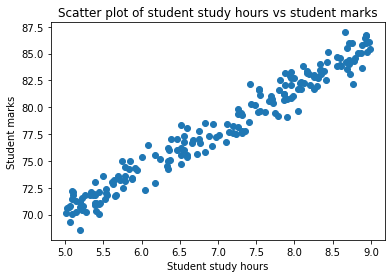

In [8]:
# NOW Plot the scatter diagram
x=df.study_hours

y=df.student_marks
plt.scatter(x,y)
plt.xlabel("Student study hours")
plt.ylabel("Student marks")
plt.title("Scatter plot of student study hours vs student marks")
plt.show()

In [9]:
# It the abave chart u can see it show as linera means when we
# increase the time the marks of student increase in linear order


# Now prepare the data For ML Algorithm

# data Cleaning

In [10]:
df.isnull()
# show where data is missing as True

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [11]:
df.isnull().sum()
# Means total null value is 5  

study_hours      5
student_marks    0
dtype: int64

In [12]:
mean=df.mean()
mean
# means total 6.99 hr max student reading a get marks 77.93 

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [13]:
# now null value fill to the mean value

In [14]:
df2=df.fillna(mean)
df2

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [15]:
df2.isnull().sum()
# all null places fill to mean value

study_hours      0
student_marks    0
dtype: int64

In [16]:
# split the data

In [17]:
X=df2.drop("student_marks", axis="columns")
y=df2.drop("study_hours", axis="columns")
print("shape of x = ",X.shape)
print("shape of y = ",y.shape)

shape of x =  (200, 1)
shape of y =  (200, 1)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=51)
print("shape of X_tarin =",X_train.shape)
print("shape of X_test =",X_test.shape)
print("shape of y_train =",y_train.shape)
print("shape of y_test =",y_test.shape)

shape of X_tarin = (160, 1)
shape of X_test = (40, 1)
shape of y_train = (160, 1)
shape of y_test = (40, 1)


In [20]:
# here u can see test data set have 20% and treanuing data set have 80% value

# Select a model and train it

In [21]:
# Now the above scatter plot u can see that when study hours increase then the marks of student also increase in linera order 
# here we can use equaction of line y= mx+c 
# Here it is the linear regression equestion 
# i have y and x but not have c and m 
# so we work to find c and  m
# the apply linear regression algorithm

In [22]:
# Here import the linearRegression
from sklearn.linear_model import LinearRegression

In [23]:
# here create the object of linearRegression 
lr = LinearRegression()

In [24]:
# here fit the treaining data in linearRegression
lr.fit(X_train,y_train)
# here after traning the model find the m and c value 

LinearRegression()

In [25]:
# Now check m and c value

In [26]:
lr.coef_
# coef_ means value of m 

array([[3.93571802]])

In [27]:
lr.intercept_
# this is the value of c 

array([50.44735504])

In [28]:
# now
m = 3.93
c = 50.44
y = m * 5 + c 
y

70.09

In [29]:
# Here i pass x  = 5 meas study hours is 5  then give the result as a marks = 70.09

In [30]:
# here not need to use the match formula you have a function name as predict

In [31]:
lr.predict([[4]])

array([[66.1902271]])

In [32]:
lr.predict([[4]])[0][0]

66.19022710353573

In [33]:
lr.predict([[4]])[0][0].round(2)

66.19

# Now going for testing

In [34]:
y_predict=lr.predict(X_test)
y_predict

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [35]:
# Now we join actual value and predict value

In [36]:
df3=pd.DataFrame(np.c_[X_test,y_test,y_predict],columns=["study hours","student marks original","student predict marks"])
df3

,study hours,student marks original,student predict marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


# Fine-tune your model

In [37]:
lr.score(X_test,y_test)
# Means my model say that i give 0.95% accuraty

0.9514124242154464

In [38]:
# Now check how can it predict my model

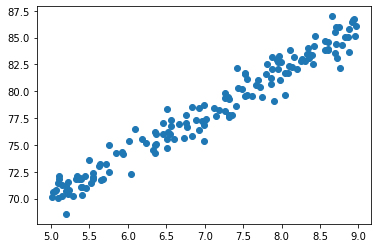

In [39]:
plt.scatter(X_train,y_train) 
plt.show()

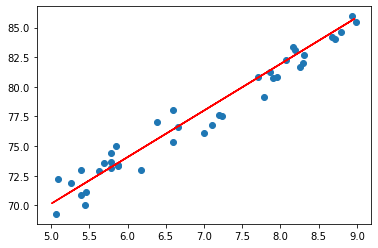

In [40]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color='r')

# Present your solution

In [41]:
# Save the Model

In [42]:
import joblib
joblib.dump(lr,"student_marks_predictor_model.pkl")

['student_marks_predictor_model.pkl']

In [43]:
model=joblib.load("student_marks_predictor_model.pkl")
model

LinearRegression()

In [44]:
model.predict([[4]])

array([[66.1902271]])

In [45]:
model.predict([[2]])

array([[58.31879107]])

In [50]:
model.predict([[1]])[0][0]

54.38307305359076

In [47]:
# model take only m and c values 

# Now Lunch Monitor and maintain your system